In [4]:
from contextlib import redirect_stdout
import os

from model import WorldModel

import numpy as np
import matplotlib.pyplot as plt




In [5]:
model = WorldModel(100)
for i in range(100):
    with redirect_stdout(open(os.devnull, "w")):
        model.step()

In [6]:
%matplotlib inline

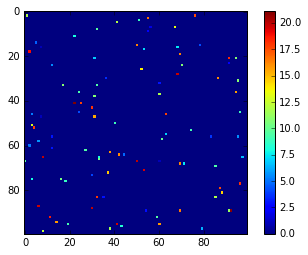

In [7]:
def plot():
    cell_nationalisms = np.zeros((model.grid.width, model.grid.height))
    for cell in model.grid.coord_iter():
        cell_nationalism = 0
        cell_content, x, y = cell
        if cell_content:
            cell_nationalism = sum(c.nationalism for c in cell_content) / len(cell_content)
        cell_nationalisms[x][y] = cell_nationalism
    
    plt.imshow(cell_nationalisms, interpolation='nearest')
    plt.colorbar()
plot()

In [8]:
agent_nationalism = model.datacollector.get_agent_vars_dataframe()
agent_nationalism.head()


Nationalism   X   Y
Step AgentID                     
0    0          18.173924  80  96
     1           5.607236  17   9
     2          12.322999  27  62
     3          13.859765  23  52
     4          18.729645  78  19

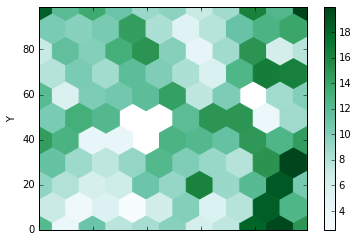

In [9]:
agent_nationalism.plot.hexbin(x='X', y='Y', C='Nationalism', gridsize=10, reduce_C_function=np.mean)